In [5]:
import warnings
warnings.filterwarnings("ignore")


In [6]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# 데이터셋 로드
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

# 데이터셋의 기본 정보 확인
print("데이터셋의 첫 5개 행:")
print(data.head())

print("\n데이터셋의 기본 통계:")
print(data.describe())

print("\n타겟 클래스 분포:")
print(data['target'].value_counts())


데이터셋의 첫 5개 행:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target

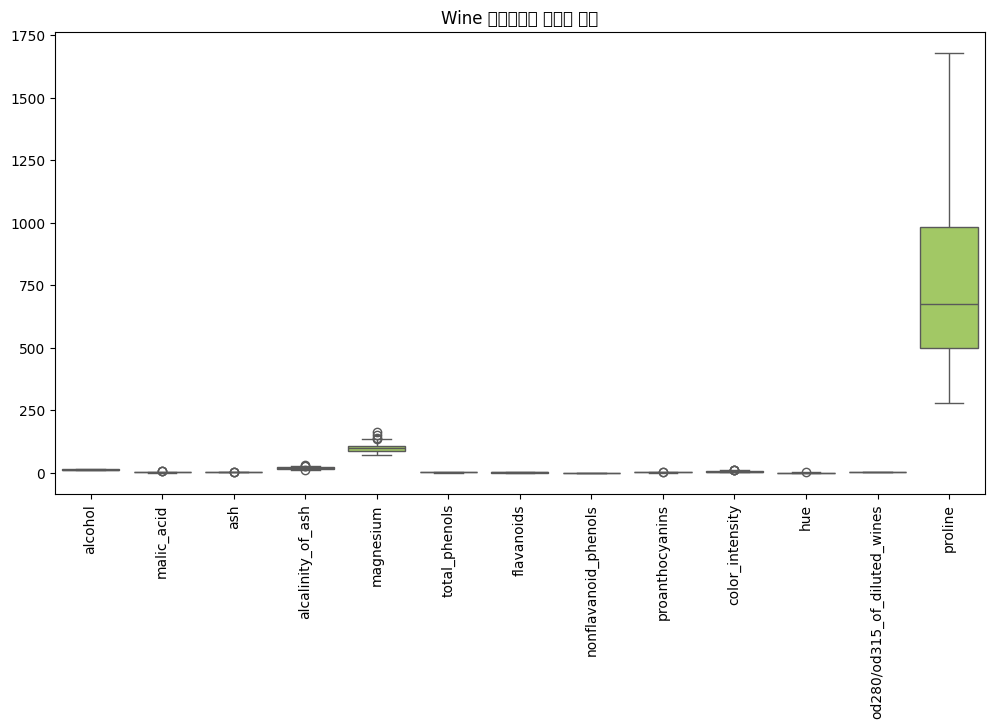

In [7]:
# 데이터 분포 시각화: 특성별 박스 플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop('target', axis=1), palette="Set2")
plt.title('Wine 데이터셋의 특성별 분포')
plt.xticks(rotation=90)
plt.show()


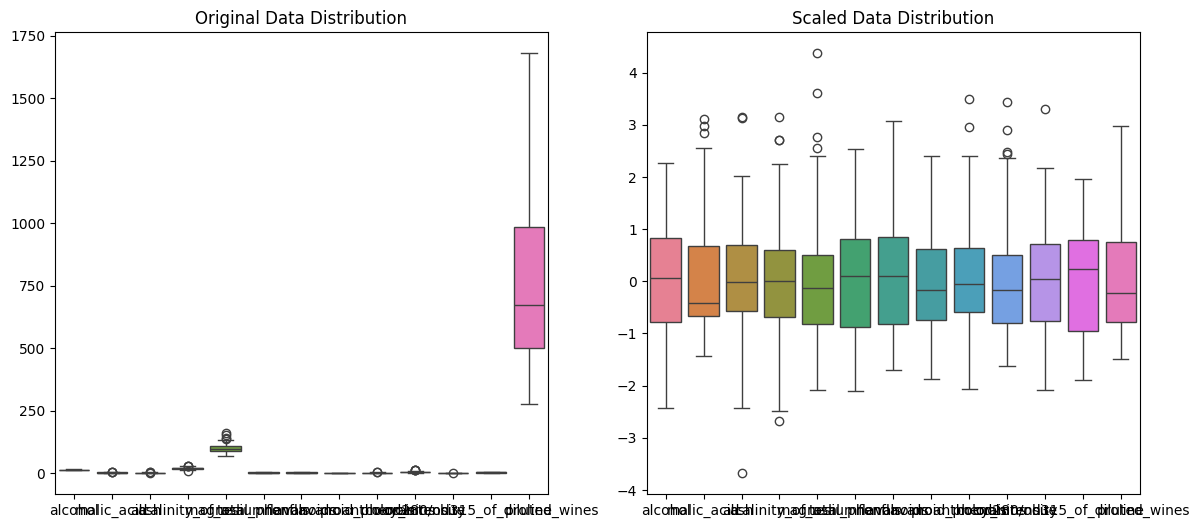

In [8]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('target', axis=1))

# 스케일링 후 데이터의 분포 시각화
scaled_data_df = pd.DataFrame(scaled_data, columns=wine.feature_names)

# 원본 데이터와 스케일링된 데이터의 분포 비교
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=data.drop('target', axis=1), ax=ax[0]).set_title('Original Data Distribution')
sns.boxplot(data=scaled_data_df, ax=ax[1]).set_title('Scaled Data Distribution')
plt.show()


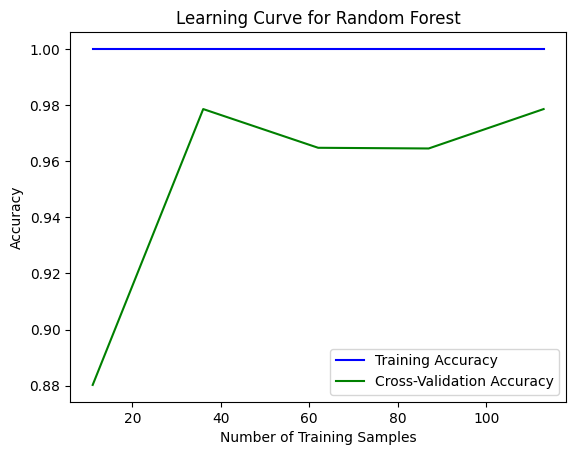

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(scaled_data_df, data['target'], test_size=0.2, random_state=42)

# Random Forest 모델 정의
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# 학습 곡선 시각화
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Accuracy', color='green')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


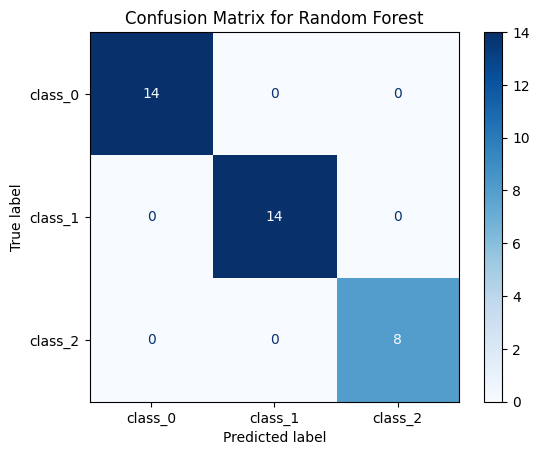

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 모델 훈련
rf_model.fit(X_train, y_train)

# 예측
rf_preds = rf_model.predict(X_test)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, rf_preds)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()


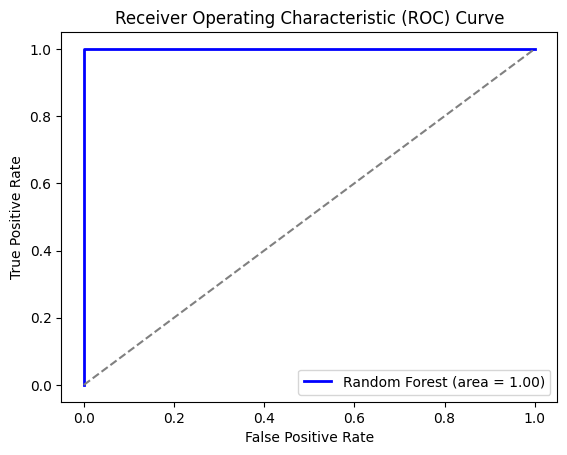

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Label Binarizer 사용하여 이진화
lb = LabelBinarizer()
y_bin = lb.fit_transform(y_test)

# ROC 곡선 계산
fpr, tpr, _ = roc_curve(y_bin[:, 0], rf_model.predict_proba(X_test)[:, 0])
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


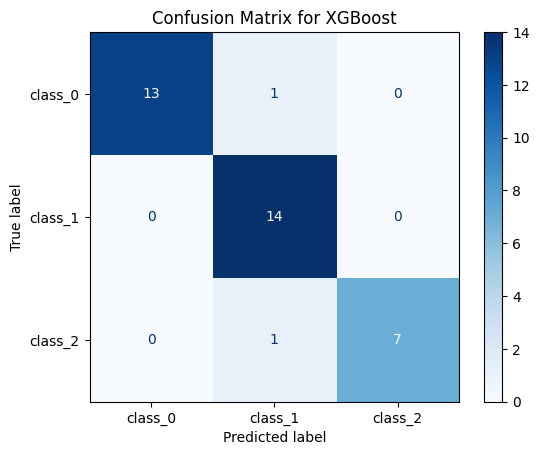

In [17]:
from xgboost import XGBClassifier

# XGBoost 모델 정의
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# XGBoost 모델 훈련
xgb_model.fit(X_train, y_train)

# XGBoost 예측
xgb_preds = xgb_model.predict(X_test)

# 혼동 행렬 계산 (XGBoost)
cm_xgb = confusion_matrix(y_test, xgb_preds)

# 혼동 행렬 시각화 (XGBoost)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=wine.target_names)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost')
plt.show()


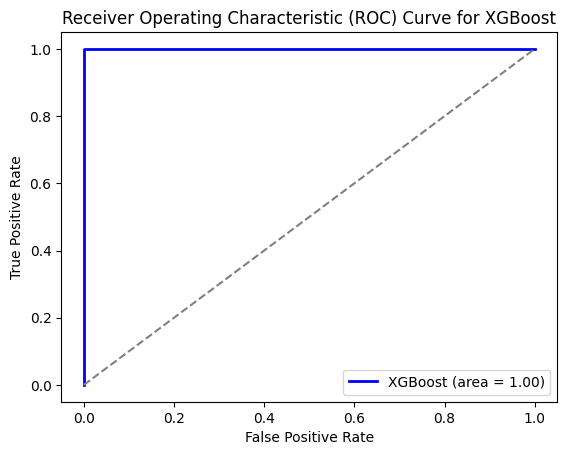

In [18]:
# XGBoost ROC 커브 시각화
fpr_xgb, tpr_xgb, _ = roc_curve(y_bin[:, 0], xgb_model.predict_proba(X_test)[:, 0])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# XGBoost ROC 커브 시각화
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Step 1: 데이터셋 로딩
Step 2: 데이터셋 분할
훈련 데이터: 124개, 테스트 데이터: 54개
Step 3: 모델 정의
Step 4: 모델 학습 및 예측
  - RandomForestClassifier 모델 학습 시작...
  - RandomForestClassifier 모델 정확도: 1.0000
  - GradientBoostingClassifier 모델 학습 시작...
  - GradientBoostingClassifier 모델 정확도: 0.9074
  - XGBClassifier 모델 학습 시작...
  - XGBClassifier 모델 정확도: 0.9630
  - StackingClassifier 모델 학습 시작...
  - StackingClassifier 모델 정확도: 0.9815
Step 5: 결과 시각화


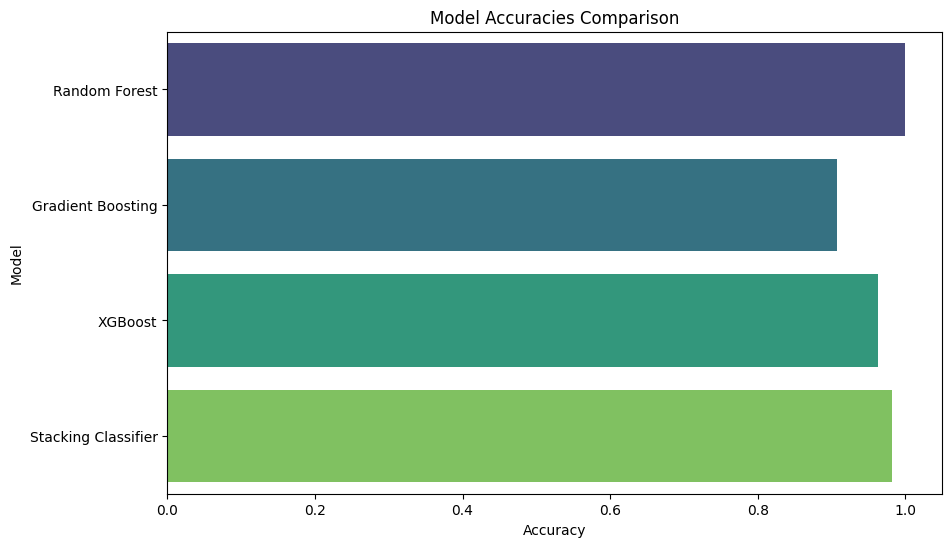

In [19]:
import warnings
warnings.filterwarnings("ignore")

# 필요한 라이브러리 임포트
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 데이터셋 로딩 및 확인
print("Step 1: 데이터셋 로딩")
wine = load_wine()
X = wine.data
y = wine.target

# 데이터셋 분할
print("Step 2: 데이터셋 분할")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"훈련 데이터: {X_train.shape[0]}개, 테스트 데이터: {X_test.shape[0]}개")

# 모델 정의
print("Step 3: 모델 정의")
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Stacking 모델 정의
estimators = [('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(random_state=42))

# 모델 리스트
models = [rf_model, gb_model, xgb_model, stacking_model]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Stacking Classifier']
accuracies = []

# 모델 학습 및 예측
print("Step 4: 모델 학습 및 예측")
for model in models:
    print(f"  - {model.__class__.__name__} 모델 학습 시작...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    accuracies.append(accuracy)
    print(f"  - {model.__class__.__name__} 모델 정확도: {accuracy:.4f}")

# 결과 시각화
print("Step 5: 결과 시각화")
plt.figure(figsize=(10,6))
sns.barplot(x=accuracies, y=model_names, palette="viridis", errorbar=None)  # 정확도를 시각화
plt.title("Model Accuracies Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()